In [1]:
import numpy as np

x=42
eps=2**-52
dx=eps**(1/3)

x2=x+dx
dx=x2-x

f1=np.exp(x)
f2=np.exp(x2)
deriv=(f2-f1)/dx
print('derivative is ',deriv,' with fractional error ',deriv/f1-1)


f0=np.exp(x-dx)
deriv=(f2-f0)/(2*dx)
print('derivative is ',deriv,'with new error ',(deriv/f1-1))

derivative is  1.7392802076046339e+18  with fractional error  3.0277467968353733e-06
derivative is  1.7392749415450394e+18 with new error  1.4108492152331564e-11


In [11]:
import numpy as np
from matplotlib import pyplot as plt

x=np.linspace(-10,10,1001)
dx=x[1]-x[0]
y=np.sin(x)

xx=np.linspace(x[2],x[-3],1001)
yy=np.empty(len(xx))
for i in range(3):#len(xx)):
    ind=(xx[i]-x[0])/dx
    ind=int(np.floor(ind))
    x_use=x[ind-1:ind+3]
    y_use=y[ind-1:ind+3]
    print(ind)
    print(x_use)
    p=np.polyfit(x_use,y_use,3)
    print(p)
    yy[i]=np.polyval(p,xx[i])
    



y_true=np.sin(xx)
if False:
    plt.ion()
    plt.clf()
    plt.plot(x,y,'*')
    plt.plot(xx,yy)

    plt.plot(xx,y_true)
    plt.show()
print('error in interpolation is ',np.std(yy-y_true))

2
[-9.98 -9.96 -9.94 -9.92]
[  0.1441949    4.053536    36.97318797 109.11719732]
2
[-9.98 -9.96 -9.94 -9.92]
[  0.1441949    4.053536    36.97318797 109.11719732]
3
[-9.96 -9.94 -9.92 -9.9 ]
[  0.14583721   4.10250978  37.45998667 110.73011935]
error in interpolation is  5.6283072730698525


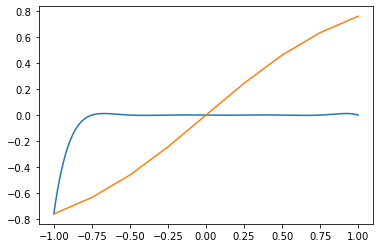

In [14]:
import numpy as np
from matplotlib import pyplot as plt

xmin=-1
xmax=1
npt=9
x=np.linspace(xmin,xmax,npt)
y=np.tanh(x)
xx=np.linspace(x[0],x[-1],2001)


p=np.ones(len(xx))
for i in range(1,npt):
    p=p*(xx-x[i])

p=p/p[0]*y[0]

plt.ion()
plt.clf()
plt.plot(xx,p)
plt.plot(x,y)


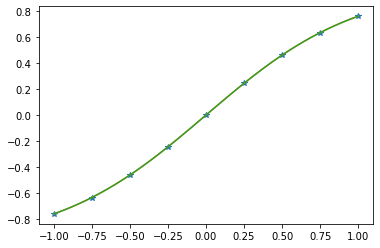

In [16]:
import numpy as np
from scipy import interpolate
from matplotlib import pyplot as plt


xmin=-1
xmax=1
npt=9
x=np.linspace(xmin,xmax,npt)
y=np.tanh(x)
#y[-2:]=y[-3]
xx=np.linspace(x[0],x[-1],2001)



spln=interpolate.splrep(x,y)
yy=interpolate.splev(xx,spln)

plt.clf()
plt.plot(x,y,'*')
plt.plot(xx,yy)
plt.plot(xx,np.tanh(xx))
plt.show()

0.026190883061469748


/Users/Nini/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


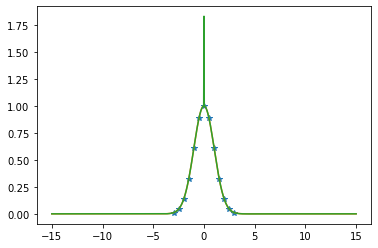

/Users/Nini/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


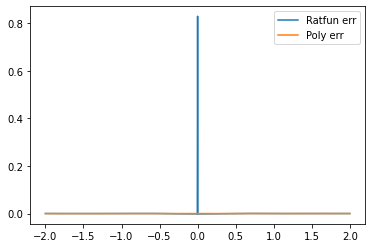

In [7]:
import numpy as np
from matplotlib import pyplot as plt

def rat_eval(p,q,x):
    top=0
    for i in range(len(p)):
        top=top+p[i]*x**i
    bot=1
    for i in range(len(q)):
        bot=bot+q[i]*x**(i+1)
    return top/bot

def rat_fit(x,y,n,m):
    assert(len(x)==n+m-1)
    assert(len(y)==len(x))
    mat=np.zeros([n+m-1,n+m-1])
    for i in range(n):
        mat[:,i]=x**i
    for i in range(1,m):
        mat[:,i-1+n]=-y*x**i
    pars=np.dot(np.linalg.inv(mat),y)
    p=pars[:n]
    q=pars[n:]
    return p,q


#1*p0 + x*p1 +x**2+p2+... -q1*x - q2*x**2... = y

n=4
m=7
x=np.linspace(-3,3,n+m-1)
y=np.exp(-0.5*x**2)
p,q=rat_fit(x,y,n,m)
xx=np.linspace(5*x[0],5*x[-1],1001)
y_true=np.exp(-0.5*xx**2)
pred=rat_eval(p,q,xx)
plt.clf();plt.plot(x,y,'*')
plt.plot(xx,y_true)
plt.plot(xx,pred)

fitp=np.polyfit(x,y,n+m-1)
pred_poly=np.polyval(fitp,xx)

plt.clf();plt.plot(x,y,'*');plt.plot(xx,y_true);plt.plot(xx,pred)
print(np.std(y_true - pred))
plt.show()



xx=np.linspace(-2,2,1001)
yy=np.exp(-0.5*xx**2)
yy_interp=rat_eval(p,q,xx)
plt.ion()
plt.clf()
plt.plot(xx,yy_interp-yy)


#we can use numpy's polynomial fitter to see how that does
pp=np.polyfit(x,y,n+m) #use same number of terms
yy_poly=np.polyval(pp,xx)
plt.plot(xx,yy_poly-yy)
plt.legend(['Ratfun err','Poly err'])
plt.savefig('ratfit_vs_poly.png')